In [1]:
%matplotlib inline
from subs import *
import matplotlib.pyplot as plt

In [2]:
def gen_plot(ax1, ax2, var,exp=True, dir='./'):
    allMin=sum_th(var,r=rMin,dir=dir);
    allMax=sum_th(var,r=rMax,dir=dir);
    th_cs=data['3S1_cs']
    ax1.fill_between(allMin[:,0],allMin[:,1],allMax[:,1],color='gray',label='total');
    ax1.plot(th_cs[:,0],th_cs[:,1],label=r'${}^3S_1^{[1]}$')
    if exp:
        exp_data=load_exp(var);
        ax1.errorbar(exp_data[:,0],exp_data[:,1],fmt='o',yerr=exp_data[:,2],label='exp')
    ax1.set_xlabel(get_xlabel(var))
    ax1.set_ylabel(get_ylabel(var))
    ratMin=div(th_cs,allMin)
    ratMax=div(th_cs,allMax)
    ax2.fill_between(ratMin[:,0],ratMin[:,1],ratMax[:,1])
    ax2.set_xlabel(get_xlabel(var))
    ax2.set_ylabel("CS/All")
    ax2.set_ylim(0,0.5)
    return f,[ax1,ax2]

In [3]:
scale=8/20;
size=10;
figsize=(size,scale*size)

# ALEPH

In [4]:
dir='../results/ALEPH/'
dir='../build/'

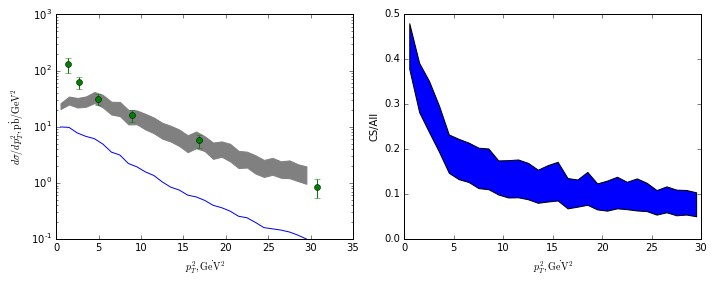

In [11]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'PT2',exp=True, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

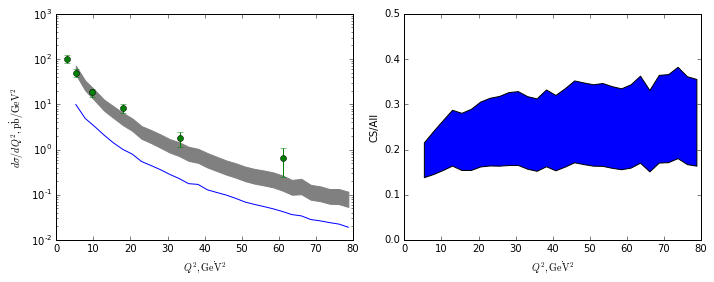

In [12]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'Q2',exp=True, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

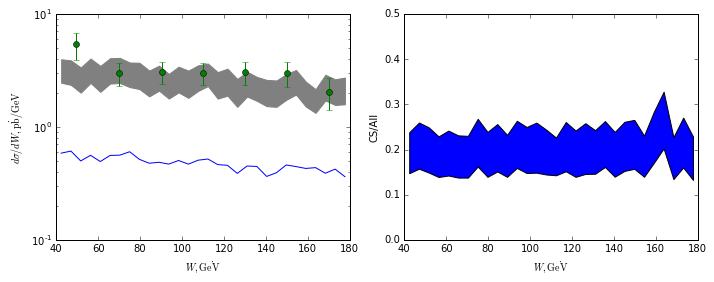

In [13]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'W',exp=True, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

# 1.3 TeV 

In [8]:
dir='../results/ecm1.3e3/'

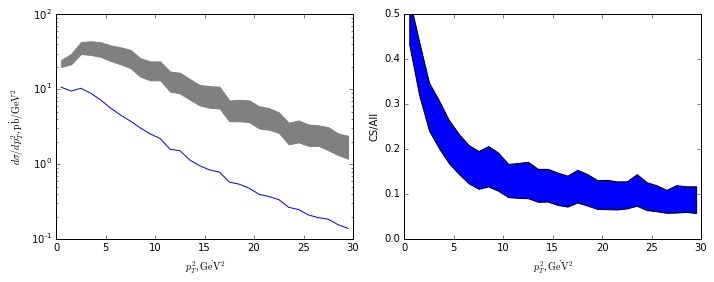

In [9]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'PT2',exp=False, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

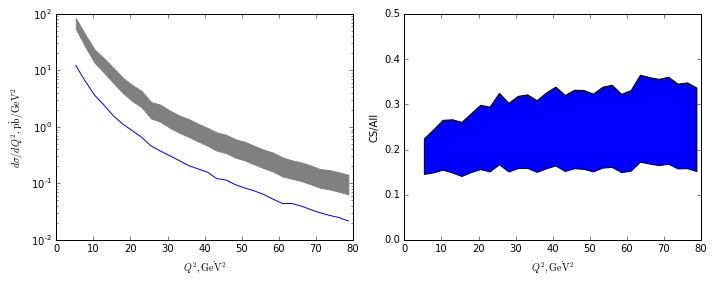

In [10]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'Q2',exp=False, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

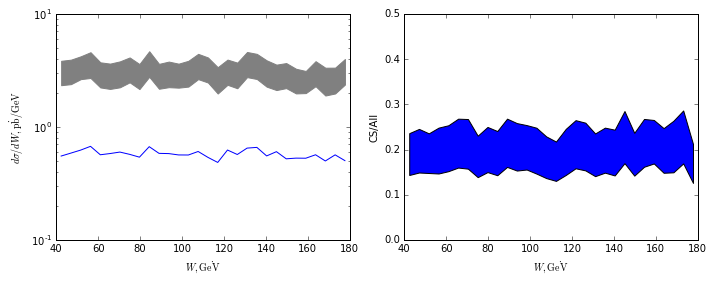

In [11]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'W',exp=False, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

# 1.98 TeV 

In [12]:
dir='../results/ecm1.98e3/'

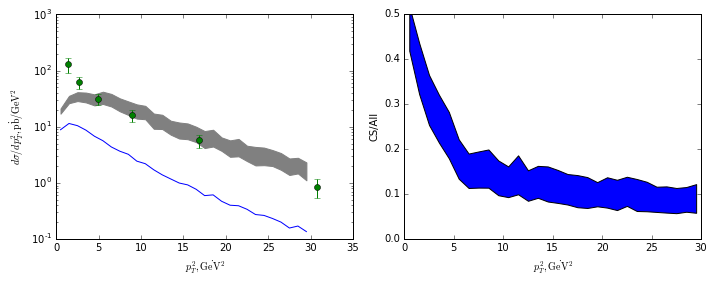

In [14]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'PT2',exp=True, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

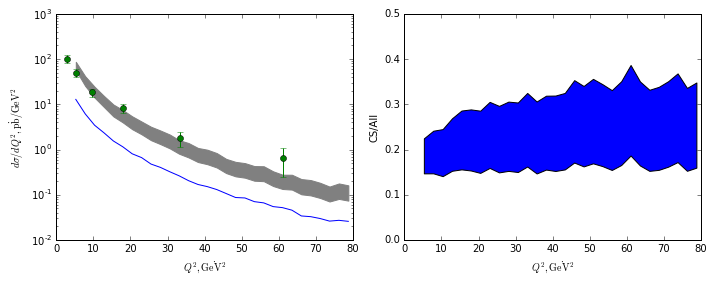

In [15]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'Q2',exp=True, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

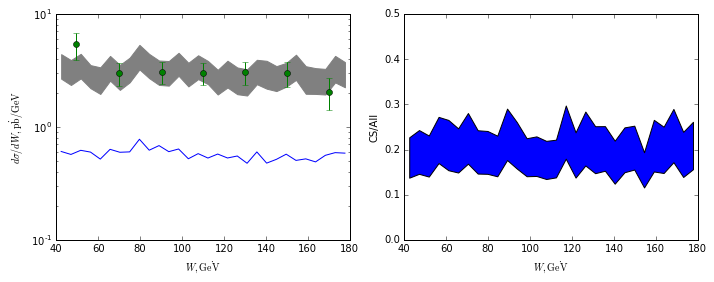

In [16]:
f, [ax1,ax2]=plt.subplots(1,2,figsize=figsize);
gen_plot(ax1,ax2,'W',exp=True, dir=dir);
ax1.set_yscale('log')
plt.tight_layout()

In [17]:
dat1=sum_th('Q2',rMin,dir='../results/ALEPH/')
dat2=sum_th('Q2',rMin,dir='../results/ecm1.3e3/')
dat3=sum_th('Q2',rMin,dir='../results/ecm1.98e3/')

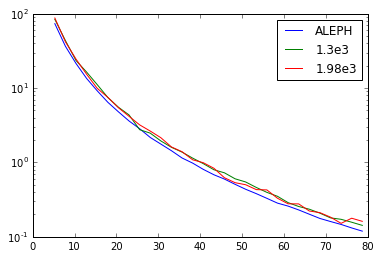

In [18]:
plt.plot(dat1[:,0],dat1[:,1],label='ALEPH')
plt.plot(dat2[:,0],dat2[:,1],label='1.3e3')
plt.plot(dat3[:,0],dat3[:,1],label='1.98e3')
plt.yscale('log')
plt.legend(loc='best')

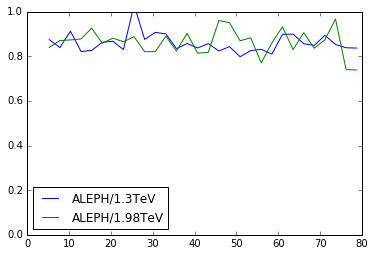

In [22]:
rat12=div(dat1,dat2)
plt.plot(rat12[:,0],rat12[:,1],label='ALEPH/1.3TeV')
rat13=div(dat1,dat3)
plt.plot(rat13[:,0],rat13[:,1],label='ALEPH/1.98TeV')
plt.ylim([0,1])
plt.legend(loc='best')